# Lesson 9
# Renuka Mulay


Import statements for necessary package(s).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

Read in the dataset from a freely and easily available source on the internet.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/renukamulay/NoteBookShare/master/data/winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Show data preparation. Normalize some numeric columns, one-hot encode some categorical columns with 3 or more categories, remove or replace missing values, remove or replace some outliers.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.2

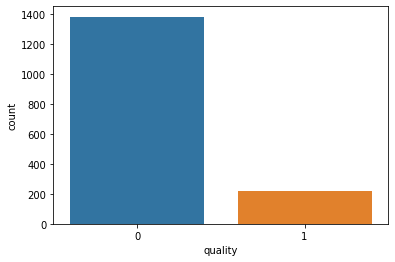

In [3]:
# DataSet doesnt have any null value in any columns
print(data.isnull().sum())

#Bin the values since we only need the 2 categories (Bad wine and good wine)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)
print(data.head(5))

# Encode the Labels 0 being bad and 1 being good.
label_quality = LabelEncoder()
data['quality'] = label_quality.fit_transform(data['quality'])
data.head(5)

# Plot the wine quality as a Histogram.
sns.countplot(data['quality'])

# Normalization is done in the next step.

Question::  Ask a binary-choice question that describes your classification. 
Write the question as a comment. 
Specify an appropriate column as your expert label for a classification (include decision comments).

Answer:: Predict if the Wine quality is good or bad?

This binary classifier tries to predict if the wine quality is good or bad based on the input features. Expert Label is Quality (1: Good quality Wine, 0 :  Bad quality wine)


Split your data set into training and testing sets using the proper function in sklearn (include decision comments).

In [4]:
# Split the dataset into 80% Training Data  and 20% Test Data.
X = data.drop('quality', axis = 1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train.head(5)

# Normalize the Training Data.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Create a classification model for the expert label based on the training data (include decision comments).

In [5]:
# Using Random Forest Classifier to predict if the wine quality is good or bad.
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train,y_train)

pred_rfc = rfc.predict(X_test)

Apply your (trained) classifiers to the test data to predict probabilities.

In [6]:
pred_rfc = rfc.predict(X_test)
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Write out to a csv a dataframe of the test data, including actual outcomes, 
and 
the probabilities of your classification.

In [7]:
# Get the Predicted Probabilities.
predicted_Probablities = rfc.predict_proba(X_test)

Training_DF = pd.DataFrame(data=X_test, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                        'residual sugar', 'chlorides', 'free sulfur dioxide', 
                                        'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                        'alcohol'])
ModelPredictions_DF = pd.DataFrame(data=pred_rfc, columns = ['Predictions'])

ModelPredictionProbablilities_DF = pd.DataFrame(data=predicted_Probablities, columns=['Prediction Probablity BadWine', 'Predicttion Probability GoodWine'])

actual_quality = y_test.reset_index()['quality']

ActualQuality_DF = pd.DataFrame(data=actual_quality.values, columns = ['Actual Quality'])

#Join the DataFrames
result = pd.concat([Training_DF, ActualQuality_DF, ModelPredictions_DF, ModelPredictionProbablilities_DF], axis=1, sort=False)

finalCsvWithColumns = pd.DataFrame(result, columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                        'residual sugar', 'chlorides', 'free sulfur dioxide', 
                                        'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                        'alcohol', 'Actual_Quality', 'Predictions', 'Prediction Probablity_BadWine', 
                                        'Predicttion_Probability_GoodWine' ])

# Write to CSV
finalCsvWithColumns.to_csv('OutComeDetails.csv', index=False)


Determine accuracy rate, which is the 
number of correct predictions divided by the total number of predictions (include brief preliminary analysis commentary).

In [8]:
matrix = confusion_matrix(y_test, pred_rfc);
accuracy_rate = (matrix[0,0] + matrix[1,1]) / (matrix[0,0] + matrix[0,1] + matrix[1,0] + matrix[1,1])
print(f"Accuracy Rate = {accuracy_rate}")

Accuracy Rate = 0.90625


Add a summary comment block that discusses your classification.

I am using the Wine data to predict the wine quality ( Good / bad ). I split the data into Traning Data and Test Data in a ratio of 80% / 20 %. 

Since this is a supervised learning where I know the labels I am trying to predict, I used the Random Forest Classifier as my classifier model.  I pre processed the data by Normalizing the columns since the columns like total sulfur dioxide had bigger values which will cause my model to be biased. After Normalizing I passed the training data to the classifier and it has an accuracy of 89 percent.

Confusion Matrix from your predicted values (specify and justify the probability threshold).

In [9]:
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 21  26]]


Precision, Recall, and F1 measures based on your Confusion Matrix.

In [10]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.74      0.55      0.63        47

   micro avg       0.91      0.91      0.91       320
   macro avg       0.83      0.76      0.79       320
weighted avg       0.90      0.91      0.90       320



Calculate the ROC curve and it's AUC using sklearn. Present the ROC curve. Present the AUC in the ROC's plot.

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc(models, model_names):
    plt.figure(0, figsize = [8, 7]).clf()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    for ii, model in enumerate(models):
        y_prob_test = model.predict_proba(X_train)
        fpr, tpr, threshold = roc_curve(y_test, y_prob_test, pos_label = "yes")
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = "{} AUC = {:0.2f}".format(model_names[ii], roc_auc))

    plt.legend(loc = 'lower right');
    

# This is not working as expected.

#plot_roc([rfc],['rfc'])

Add a summary comment block that discusses your classification and its accuracy.

I am using the Wine data to predict the wine quality ( Good / bad ). I split the data into Traning Data and Test Data in a ratio of 80% / 20 %. 

Since this is a supervised learning where I know the labels I am trying to predict, I used the Random Forest Classifier as my classifier model.  I pre processed the data by Normalizing the columns since the columns like total sulfur dioxide had bigger values which will cause my model to be biased. After Normalizing I passed the training data to the classifier and it has an accuracy of 89 percent.